In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Original Image')

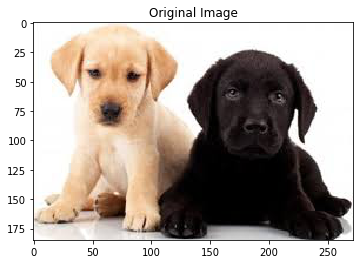

In [2]:
#viewing the image on a plot
img1 = mpimg.imread('dogs.jpeg')
fig, ax = plt.subplots()
ax.imshow(img1)
ax.set_title('Original Image')

In [3]:
#loading image and obtaining its RGB values
img = Image.open('dogs.jpeg')
#converting image into numpy array and obtaining its RGB values
img_np = np.asarray(img)
img_np

array([[[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[252, 248, 249],
        [254, 250, 251],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 245, 246],
        [250, 248, 249],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [244, 244, 244]],

       [[253, 251, 254],
        [253, 251, 254],
        [253, 251, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [4]:
#viewing the shape of the new array
img_np.shape

(185, 272, 3)

In [5]:
#reshaping our image to a two dimensional array
pixels = img_np.reshape(img_np.shape[0] * img_np.shape[1], img_np.shape[2])
pixels.shape

(50320, 3)

In [6]:
#creating our model 
model = KMeans(n_clusters= 3)
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
#displaying the cluster label and cluster centres
pixel_centroids = model.labels_
cluster_centres = model.cluster_centers_
#viewing the labels
pixel_centroids

array([1, 1, 1, ..., 1, 1, 1])

In [8]:
cluster_centres

array([[ 29.52558775,  21.59168945,  20.48217605],
       [251.50830598, 247.73027013, 243.2301439 ],
       [210.70527607, 174.93333333, 143.83337423]])

In [15]:
#assigning clusters to their labels
final = np.zeros((pixel_centroids.shape[0],3))
for cluster_no in range(3):
    final[pixel_centroids == cluster_no] = cluster_centres[cluster_no]
final[0:5]

array([[251.50830598, 247.73027013, 243.2301439 ],
       [251.50830598, 247.73027013, 243.2301439 ],
       [251.50830598, 247.73027013, 243.2301439 ],
       [251.50830598, 247.73027013, 243.2301439 ],
       [251.50830598, 247.73027013, 243.2301439 ]])

In [16]:
#reshaping image to original dimension
comp_img = final.reshape(img_np.shape[0], img_np.shape[1], 3)
comp_img.shape

(185, 272, 3)

Text(0.5, 1.0, 'Newly Reconstructed Dog image')

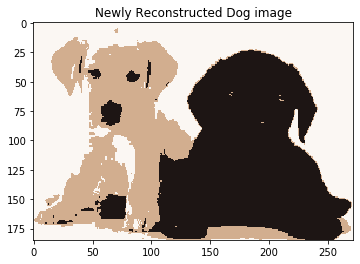

In [17]:
#converting pixel values to image
comp_img = Image.fromarray(np.uint8(comp_img))
comp_img.save('reconstructed dog image.png')
img2 = mpimg.imread('reconstructed dog image.png')
#plotting the compressed image
fig, ax = plt.subplots()
ax.imshow(img2)
ax.set_title('Newly Reconstructed Dog image')